In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.font_manager import FontProperties

prop = FontProperties(fname='/System/Library/Fonts/Apple Color Emoji.ttc')
# plt.rcParams['font.family'] = prop.get_family()
mpl.rc('font', family=prop.get_family())

In [2]:
sites = ["Grouse Camp", "Pope Ridge", "Sentinel Butte", "Three Creeks Meadow"]
fire_dates = {
    'Pope Ridge': "2014-07-16",
    'Three Creeks Meadow': "2012-09-09",
    'Sentinel Butte': "2015-08-11",
    'Grouse Camp': "2012-09-08",
    'Harts Pass': "2003-08-05"
}

In [79]:
dfs = {}
for site in fire_dates:    
    df = pd.read_csv(f"./data/fire_sites/{site}_swe_meltdates.csv", parse_dates=['last_snow'])

    df['date'] = df.apply(lambda row: datetime.strptime(f"{row['water_year']}-{row['last_snow'].month}-{row['last_snow'].day}", "%Y-%m-%d"), axis=1) 
    df['doy'] = df.apply(lambda row: int(row['date'].strftime("%j")), axis=1)
    df['water_year'] = df.apply(lambda row: datetime.strptime(f"{row['water_year']}-10-01", "%Y-%m-%d"), axis=1)
    
    dfs[site] = df

control_sites = ["Gold Axe Camp", "Irish Taylor", "Rainy Pass", "Trinity", "Trough"]
pairs = {
    'Pope Ridge': 'Trinity',
    'Harts Pass': 'Rainy Pass',
    'Grouse Camp': 'Trough',
    'Sentinel Butte': 'Gold Axe Camp',
    'Three Creeks Meadow': 'Irish Taylor'
}
controls = {}
for control_site in control_sites:
    df = pd.read_csv(f"./data/fire_sites/paired_locs/{control_site}_swe_meltdates.csv", parse_dates=['last_snow'])
    
    df['date'] = df.apply(lambda row: datetime.strptime(f"{row['water_year']}-{row['last_snow'].month}-{row['last_snow'].day}", "%Y-%m-%d"), axis=1) 
    df['doy'] = df.apply(lambda row: int(row['date'].strftime("%j")), axis=1)
    df['water_year'] = df.apply(lambda row: datetime.strptime(f"{row['water_year']}-10-01", "%Y-%m-%d"), axis=1)
    
    controls[control_site] = df

In [74]:
controls['Trough']

,water_year,last_snow,date,doy
0,1979,1900-05-22,1979-05-22,142
1,1980,1900-05-08,1980-05-08,129
2,1981,1900-05-15,1981-05-15,135
3,1982,1900-05-26,1982-05-26,146
4,1983,1900-05-23,1983-05-23,143
5,1984,1900-05-12,1984-05-12,133
6,1985,1900-04-18,1985-04-18,108
7,1986,1900-04-08,1986-04-08,98
8,1987,1900-04-17,1987-04-17,107
9,1988,1900-04-17,1988-04-17,108


In [4]:
controls.keys()

dict_keys(['Gold Axe Camp', 'Irish Taylor', 'Rainy Pass', 'Trinity', 'Trough'])

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:>]


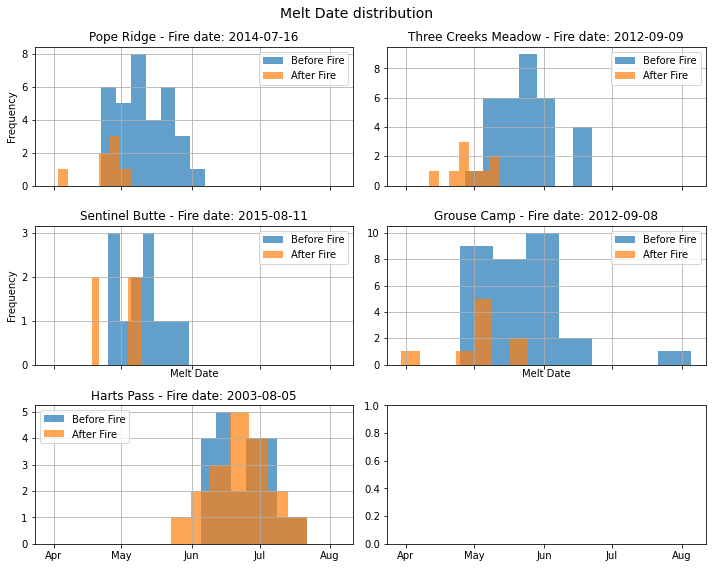

In [5]:
# Distribution of melt dates
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, figsize=(10, 8))

axes = axes.flatten()
print(axes)

for site, ax in zip(fire_dates, axes):
    df = dfs[site]
    df[df['date']<fire_dates[site]]['doy'].hist(bins=7, ax=ax, label=f'Before Fire', alpha=0.7)
    df[df['date']>=fire_dates[site]]['doy'].hist(bins=7, ax=ax, label=f'After Fire', alpha=0.7)
    ax.set_title(f"{site} - Fire date: {fire_dates[site]}")
    ax.legend()

axes[2].set_xlabel("Melt Date")
axes[3].set_xlabel("Melt Date")
axes[0].set_ylabel("Frequency")
axes[2].set_ylabel("Frequency")

xfmt = mpl.dates.DateFormatter('%b')
months = mpl.dates.MonthLocator()
weeks = mpl.dates.DayLocator(interval=7)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(xfmt)
    
fig.suptitle("Melt Date distribution", fontsize=14)
plt.tight_layout()

Some observations:
- For ANOVA test it is required for the distribution of data to have similar std. devs, but looks like this requirement doesn't hold true in this case. This is not because of a shift in nature of the data, but the availability of data post and pre fire. Data before fire is numerous, while the fires are fairly recent events and hence there are not a lot of data points after the fire.

[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]


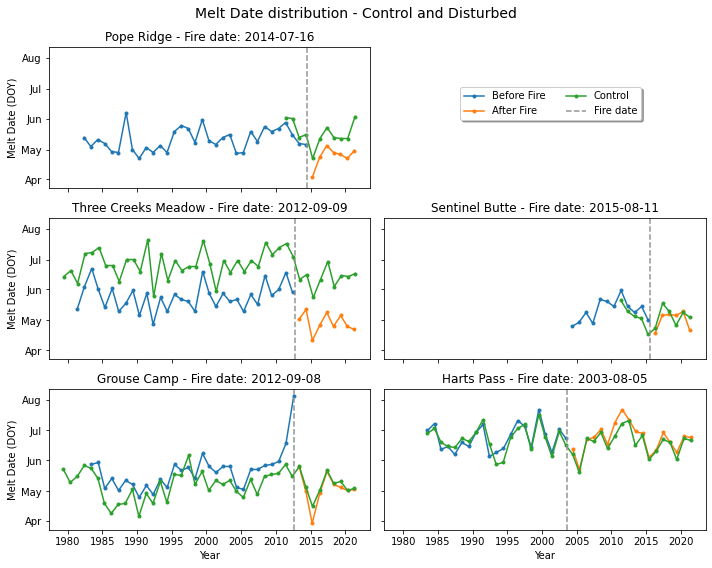

In [107]:
# Lets plot a line plot - should have a jump to earlier melt dates
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(10, 8))

axes = list(axes.flatten())
axes[1].axis('off')
axes.pop(1)
print(axes)

for site, ax in zip(fire_dates, axes):
    df = dfs[site]
    control_df = controls[pairs[site]]
    
    pre = df[df['date']<fire_dates[site]]
    post = df[df['date']>=fire_dates[site]]
    
    ax.plot(pre['date'], pre['doy'], marker='.')
    ax.plot(post['date'], post['doy'], marker='.')
    ax.plot(control_df['date'], control_df['doy'], marker='.')
    
    fire = datetime.strptime(fire_dates[site], "%Y-%m-%d")
    ax.axvline(fire, linestyle='--', color='xkcd:grey')
    
    ax.set_title(f"{site} - Fire date: {fire_dates[site]}")
    
    
    yfmt = mpl.dates.DateFormatter('%b')
    months = mpl.dates.MonthLocator()
    ax.yaxis.set_major_locator(months)
    ax.yaxis.set_major_formatter(yfmt)

axes[4].set_xlabel("Year")
axes[3].set_xlabel("Year")
axes[0].set_ylabel("Melt Date (DOY)")
axes[1].set_ylabel("Melt Date (DOY)")
axes[3].set_ylabel("Melt Date (DOY)")


fig.legend(['Before Fire', 'After Fire', 'Control', 'Fire date'], bbox_to_anchor=[0.77, 0.85], ncol=2, shadow=True, fancybox=True, loc='upper center')
fig.suptitle("Melt Date distribution - Control and Disturbed", fontsize=14)
plt.tight_layout()

[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]


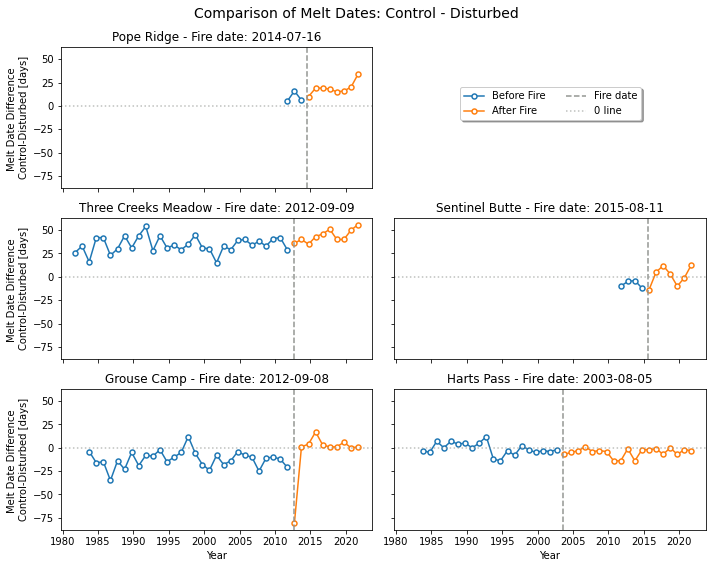

In [117]:
# Lets plot a line plot - should have a jump to earlier melt dates
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(10, 8))

axes = list(axes.flatten())
axes[1].axis('off')
axes.pop(1)
print(axes)

for site, ax in zip(fire_dates, axes):
    df = dfs[site]
    control_df = controls[pairs[site]]
    
    min_d = max(df.iloc[0].loc['water_year'], control_df.iloc[0].loc['water_year'])
    max_d = min(df.iloc[-1].loc['water_year'], control_df.iloc[-1].loc['water_year'])
    
    df = df.set_index('water_year')
    control_df = control_df.set_index('water_year')
    
    df = df.loc[df.index>=min_d]
    control_df = control_df.loc[control_df.index>=min_d]
    
    pre_df = df[df.index<fire_dates[site]]
    post_df = df[df.index>=fire_dates[site]]
    pre_control = control_df[control_df.index<fire_dates[site]]
    post_control = control_df[control_df.index>=fire_dates[site]]
    
    
    ax.plot(pre_control['doy'] - pre_df['doy'], marker='.', markersize=10, markerfacecolor='white', markeredgewidth=1.5)
    ax.plot(post_control['doy'] - post_df['doy'], marker='.', markersize=10, markerfacecolor='white', markeredgewidth=1.5)
    
    fire = datetime.strptime(fire_dates[site], "%Y-%m-%d")
    ax.axvline(fire, linestyle='--', color='xkcd:grey')
    ax.axhline(0, linestyle='dotted', color='xkcd:grey', alpha=0.6)
    
    ax.set_title(f"{site} - Fire date: {fire_dates[site]}")

axes[4].set_xlabel("Year")
axes[3].set_xlabel("Year")
axes[0].set_ylabel("Melt Date Difference \nControl-Disturbed [days]")
axes[1].set_ylabel("Melt Date Difference \nControl-Disturbed [days]")
axes[3].set_ylabel("Melt Date Difference \nControl-Disturbed [days]")


fig.legend(['Before Fire', 'After Fire', 'Fire date', '0 line'], bbox_to_anchor=[0.77, 0.85], ncol=2, shadow=True, fancybox=True, loc='upper center')
fig.suptitle("Comparison of Melt Dates: Control - Disturbed", fontsize=14)
plt.tight_layout()

DONE: Descriptive - Mean, variance melt out dates, prior vs. post; 

TODO: Where do the post fire melt outs lie w.r.t the pre fire pdfs

TODO: Add the control sites in the above plot as well. AND plot the difference of melt dates.

DANNY: DiD of melt dates.

TODO: Harts pass fire was back in 2003, so more data poitns to work with. We can possibly comment on the state of SWE after some yeara sin other locations based on harts pass observations

# Descriptive Stats

In [195]:
from tabulate import tabulate

def describe(df):
    mean = df['doy'].mean()
    melt_date = datetime.strptime(f"{int(mean)}", '%j').strftime('%B-%d')
    std = df['doy'].std()
    return mean, melt_date, std

# Mean
for site in fire_dates:
    df = dfs[site]
    control_df = controls[pairs[site]]
    
    # Overall stats
    mean_melt_doy_overall, mean_melt_date_overall, std_melt_doy = describe(df)
    
    mean_melt_doy_overall_control, mean_melt_date_overall_control, std_melt_doy_control = describe(control_df)
    
    # Pre Fire
    pre_df = df[df['water_year']<fire_dates[site]]
    mean_melt_doy_pre, mean_melt_date_pre, std_melt_doy_pre = describe(pre_df)
    
    pre_control_df = control_df[control_df['water_year']<fire_dates[site]]
    mean_melt_doy_pre, mean_melt_date_pre, std_melt_doy_pre = describe(pre_control_df)
    
    # Post Fire
    post_df = df[df['water_year']>=fire_dates[site]]
    mean_melt_doy_post, mean_melt_date_post, std_melt_doy_post = describe(post_df)
    
    print(f"{site}: ", end='\n')
    print(tabulate([
        ['Mean Melt DOY', f"{mean_melt_doy_overall:.1f} Days", f"{mean_melt_doy_overall_control:.1f} Days", f"{mean_melt_doy_pre:.1f} Days", f"{mean_melt_doy_post:.1f} Days"],
        ['Mean Melt Date', mean_melt_date_overall, mean_melt_date_overall_control, mean_melt_date_pre, mean_melt_date_post],
        ['Melout-out Date Std. Dev.', f"{std_melt_doy:.1f} Days", f"{std_melt_doy_control:.1f} Days", f"{std_melt_doy_pre:.1f} Days", f"{std_melt_doy_post:.1f} Days"],
    ], headers=['Statistic', 'Overall: Disturbed', 'Overall: Control', 'Pre-Fire: Disturbed', 'Post-Fire: Disturbed']), end='\n\n')
    

Pope Ridge: 
Statistic                  Overall: Disturbed    Overall: Control    Pre-Fire: Disturbed    Post-Fire: Disturbed
-------------------------  --------------------  ------------------  ---------------------  ----------------------
Mean Melt DOY              127.0 Days            136.5 Days          130.1 Days             114.4 Days
Mean Melt Date             May-06                May-16              May-10                 April-24
Melout-out Date Std. Dev.  12.7 Days             12.4 Days           11.3 Days              10.4 Days

Three Creeks Meadow: 
Statistic                  Overall: Disturbed    Overall: Control    Pre-Fire: Disturbed    Post-Fire: Disturbed
-------------------------  --------------------  ------------------  ---------------------  ----------------------
Mean Melt DOY              137.8 Days            174.0 Days          143.3 Days             120.7 Days
Mean Melt Date             May-17                June-23             May-23                 April-3

In [210]:
from tabulate import tabulate

def describe(df):
    mean = df['doy'].mean()
    melt_date = datetime.strptime(f"{int(mean)}", '%j').strftime('%B-%d')
    std = df['doy'].std()
    return f"{mean:.1f}", melt_date, f"{std:.1f}"

# Mean
for site in fire_dates:
    df = dfs[site]
    control_df = controls[pairs[site]]
    
    
    # Overall stats
    overall_disturbed = describe(df)
    
    overall_control = describe(control_df)
    
    # Pre Fire
    pre_df = df[df['water_year']<fire_dates[site]] 
    pre_disturbed= describe(pre_df)
    
    pre_control_df = control_df[control_df['water_year']<fire_dates[site]]
    pre_control = describe(pre_control_df)
    
    # Post Fire
    post_df = df[df['water_year']>=fire_dates[site]]
    post_disturbed = describe(post_df)
    
    post_control_df = control_df[control_df['water_year']>=fire_dates[site]]
    
    print(f"{site}: ", end='\n')
    table_data = [('Mean Melt DOY', 'Meal Melt Date', 'Melt-out Date Std.Dev.'), overall_disturbed, overall_control, pre_disturbed, pre_control, post_disturbed, post_control]
    table_data = list(map(list, zip(*table_data)))
    print(tabulate(table_data, headers=['Statistic', 'Overall: Disturbed', 'Overall: Control', 'Pre-Fire: Disturbed', 'Pre-Fire: Control', 'Post-Fire: Disturbed', 'Post-Fire: Control']), end='\n\n')
#     print(tabulate([
#         ['Mean Melt DOY', f"{mean_melt_doy_overall:.1f} Days", f"{mean_melt_doy_overall_control:.1f} Days", f"{mean_melt_doy_pre:.1f} Days", f"{mean_melt_doy_post:.1f} Days"],
#         ['Mean Melt Date', mean_melt_date_overall, mean_melt_date_overall_control, mean_melt_date_pre, mean_melt_date_post],
#         ['Melout-out Date Std. Dev.', f"{std_melt_doy:.1f} Days", f"{std_melt_doy_control:.1f} Days", f"{std_melt_doy_pre:.1f} Days", f"{std_melt_doy_post:.1f} Days"],
#     ], headers=['Statistic', 'Overall: Disturbed', 'Overall: Control', 'Pre-Fire: Disturbed', 'Post-Fire: Disturbed']), end='\n\n')
    

Pope Ridge: 
Statistic               Overall: Disturbed    Overall: Control    Pre-Fire: Disturbed    Pre-Fire: Control    Post-Fire: Disturbed    Post-Fire: Control
----------------------  --------------------  ------------------  ---------------------  -------------------  ----------------------  --------------------
Mean Melt DOY           127.0                 136.5               130.1                  145.0                114.4                   114.4
Meal Melt Date          May-06                May-16              May-10                 May-25               April-24                April-24
Melt-out Date Std.Dev.  12.7                  12.4                11.3                   11.3                 10.4                    10.4

Three Creeks Meadow: 
Statistic               Overall: Disturbed    Overall: Control    Pre-Fire: Disturbed    Pre-Fire: Control    Post-Fire: Disturbed    Post-Fire: Control
----------------------  --------------------  ------------------  ---------------